# Data Mining
## Semester Project
### Supervisors: Dr. Sibt-ul-Hussain and Atique-ur-Rehman
#### By: Zeeshan Ali, i14-1623, A
###### Prediction of Gap in the Test Data -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [73]:
%pylab inline
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/zeeshan/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [74]:
print "Matplotlib version : ", matplotlib.__version__
print "Pandas version : ", pd.__version__
print "Numpy version : ", np.__version__
print "Scipy version : ", scipy.__version__

Matplotlib version :  2.0.0
Pandas version :  0.19.2
Numpy version :  1.11.3
Scipy version :  0.18.1


### Training Data Set

In [75]:
# Load the train dataset to a new dataframe
train = pd.read_csv('Supply_Demand_train_data')
train.gap.describe()

count    163491.000000
mean          9.275495
std          49.817422
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        3872.000000
Name: gap, dtype: float64

In [76]:
66*21*144 - train.shape[0]

36093

In [77]:
del train['Month']
train.tail()

,start_region_hash,Weather,temperature,PM2_5,Day,Time_slot,Facilities,region_id,Date,gap
163486,cb6041cc08444746caf6039d8b9e43cb,3.0,8.0,3.0,9,128,460,58,2016-01-09,0
163487,74ec84f1cf75cf89ae176c8c6ceec5ba,2.0,8.0,2.0,9,106,453,49,2016-01-09,0
163488,2301bc920194c95cf0c7486e5675243c,2.0,3.0,2.0,9,29,903,31,2016-01-09,0
163489,825a21aa308dea206adb49c4b77c7805,8.0,3.0,8.0,9,50,869,65,2016-01-09,0
163490,4f4041f7db0c7f69892d9b74c1a7efa1,2.0,3.0,2.0,9,11,259,10,2016-01-09,0


In [78]:
# Separate the train_X as a matrix from train dataframe
train_X = train.as_matrix(columns = np.array(train.columns[1:8]))
train_X.shape

(163491, 7)

In [79]:
# Separate the train_Y as a matrix from train dataframe
train_Y = train.as_matrix(columns = ['gap'])
train_Y.shape

(163491, 1)

#### Training Data Normalization

In [80]:
# for i in range(0, 7):
#     train_X[:, i] -= np.min(train_X[:, i])
#     train_X[:, i] /= np.max(train_X[:, i]) - np.min(train_X[:, i])

### Test Data Set

In [81]:
# Load the test dataset to a new dataframe
test = pd.read_csv('Supply_Demand_test_data')
test.tail()

,start_region_hash,Weather,temperature,PM2_5,Day,Month,Time_slot,Facilities,region_id,Date
7885,7f84bdfc2b6d4541e1f6c0a3349e0251,3.0,-1.0,3.0,23,1,67,166,52,2016-01-23
7886,7f84bdfc2b6d4541e1f6c0a3349e0251,4.0,4.0,4.0,23,1,102,166,52,2016-01-23
7887,825c426141df01d38c1b9e9c5330bdac,2.0,-4.0,2.0,23,1,139,679,30,2016-01-23
7888,de092beab9305613aca8f79d7d7224e7,4.0,4.0,4.0,23,1,43,830,61,2016-01-23
7889,08f5b445ec6b29deba62e6fd8b0325a6,4.0,4.0,4.0,23,1,43,430,43,2016-01-23


In [82]:
66*5*144 - test.shape[0]

39630

In [83]:
del test['Month']
test.tail()

,start_region_hash,Weather,temperature,PM2_5,Day,Time_slot,Facilities,region_id,Date
7885,7f84bdfc2b6d4541e1f6c0a3349e0251,3.0,-1.0,3.0,23,67,166,52,2016-01-23
7886,7f84bdfc2b6d4541e1f6c0a3349e0251,4.0,4.0,4.0,23,102,166,52,2016-01-23
7887,825c426141df01d38c1b9e9c5330bdac,2.0,-4.0,2.0,23,139,679,30,2016-01-23
7888,de092beab9305613aca8f79d7d7224e7,4.0,4.0,4.0,23,43,830,61,2016-01-23
7889,08f5b445ec6b29deba62e6fd8b0325a6,4.0,4.0,4.0,23,43,430,43,2016-01-23


In [84]:
# Separate the train_X as a matrix from train dataframe
test_X = test.as_matrix(columns = np.array(test.columns[1:8]))
test_X.shape

(7890, 7)

### Test Data Normalization

In [85]:
# for i in range(0, 7):
#     test_X[:, i] -= np.min(test_X[:, i])
#     test_X[:, i] /= np.max(test_X[:, i]) - np.min(test_X[:, i])

### Gradient Boosted Regression Model
**n_estimators**
- The number of boosting stages to perform.

Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

**max_depth**
- maximum depth of the individual regression estimators.

The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

**min_samples_split**
- The minimum number of samples required to split an internal node

**learning_rate**
- learning rate shrinks the contribution of each tree by learning_rate.

There is a trade-off between learning_rate and n_estimators.

**loss**: {‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)
- loss function to be optimized.
- ‘ls’ refers to least squares regression.
- ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order information of the input variables.
- ‘huber’ is a combination of the two.
- ‘quantile’ allows quantile regression (use alpha to specify the quantile).

In [112]:
# Fit regression model
params = {'n_estimators': 786, 'max_depth': 7, 'min_samples_split': 2, 'learning_rate': 0.5, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(train_X, train_Y)
print("Mean Squared Error for train data: %.4f" % mean_squared_error(train_Y, clf.predict(train_X)))
predicted_test_Y = clf.predict(test_X)

Mean Squared Error for train data: 11.7688


### Cross-Validation

In [ ]:
error = 100
for n in range(500, 1000, 50):
    for depth in range(5, 10):
        for rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
            params = {'n_estimators': n, 'max_depth': depth, 'min_samples_split': 2, 'learning_rate': rate, 'loss': 'ls'}
            clf = ensemble.GradientBoostingRegressor(**params)
            clf.fit(train_X, train_Y)
            print "Mean Squared Error for train data: %.4f" % mean_squared_error(train_Y, clf.predict(train_X))
            predicted_test_Y2 = clf.predict(test_X)
            mse = mean_squared_error(predicted_test_Y, predicted_test_Y2)
            print "Mean Squared Error for test data: %.4f" % mse
            if mse < error:
                error = mse
                N, Depth, Rate = n, depth, rate
                predicted_test_Y = predicted_test_Y2
print N, Depth, Rate, mse

In [ ]:
params = {'n_estimators': N, 'max_depth': Depth, 'min_samples_split': 2, 'learning_rate': Rate, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(train_X, train_Y)
print("Mean Squared Error for train data: %.4f" % mean_squared_error(train_Y, clf.predict(train_X)))
predicted_test_Y = clf.predict(test_X)

### Analyse and store the results

In [119]:
# Assign a new column named 'driver_id' to the test dataframe
updated_test_df = test.assign(gap = map(int, predicted_test_Y))
updated_test_df.head()

,start_region_hash,Weather,temperature,PM2_5,Day,Time_slot,Facilities,region_id,Date,gap
0,d4ec2125aff74eded207d2d915ef682f,4.0,4.0,4.0,27,54,31088,51,2016-01-27,38
1,b05379ac3f9b7d99370d443cfd5dcc28,3.0,3.0,3.0,27,43,6816,37,2016-01-27,101
2,44c097b7bd219d104050abbafe51bd49,4.0,5.0,4.0,27,78,609,35,2016-01-27,0
3,82cc4851f9e4faa4e54309f8bb73fd7c,4.0,4.0,4.0,27,127,14166,8,2016-01-27,122
4,38d5ad2d22b61109fd8e7b43cd0e8901,4.0,4.0,4.0,27,116,4341,24,2016-01-27,7


In [120]:
updated_test_df.tail()

,start_region_hash,Weather,temperature,PM2_5,Day,Time_slot,Facilities,region_id,Date,gap
7885,7f84bdfc2b6d4541e1f6c0a3349e0251,3.0,-1.0,3.0,23,67,166,52,2016-01-23,1
7886,7f84bdfc2b6d4541e1f6c0a3349e0251,4.0,4.0,4.0,23,102,166,52,2016-01-23,0
7887,825c426141df01d38c1b9e9c5330bdac,2.0,-4.0,2.0,23,139,679,30,2016-01-23,-10
7888,de092beab9305613aca8f79d7d7224e7,4.0,4.0,4.0,23,43,830,61,2016-01-23,1
7889,08f5b445ec6b29deba62e6fd8b0325a6,4.0,4.0,4.0,23,43,430,43,2016-01-23,0


In [121]:
updated_test_df.gap.describe()

count    7890.000000
mean       10.285425
std        59.277405
min       -75.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      1175.000000
Name: gap, dtype: float64

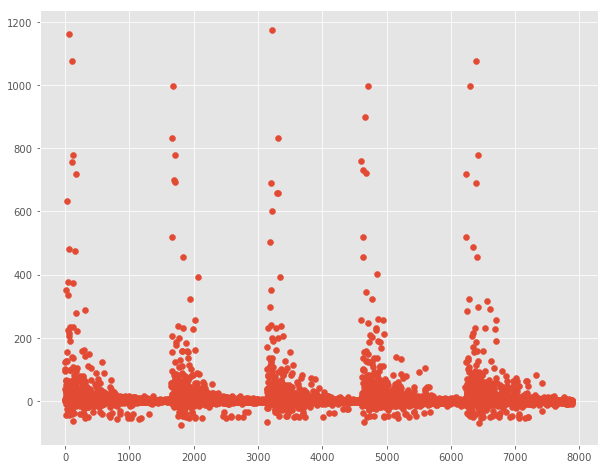

In [122]:
# Analyse the gaps predicted above
plt.scatter(range(predicted_test_Y.shape[0]), predicted_test_Y)

In [123]:
predicted_gap = {}
for index in range(updated_test_df.shape[0]):
    dist = updated_test_df.start_region_hash[index]
    Date = updated_test_df.Date[index]
    slot = updated_test_df.Time_slot[index]
    predicted_gap[dist + '_' + Date + '_' + str(slot)] = updated_test_df.gap[index]

Id, gap = [], []
firstLine = True
import csv
with open('sample.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        if firstLine:
            firstLine = False
        else:
            key = ', '.join(row).split(',')[0]
            Id.append(key)
            if key in predicted_gap.keys():
                gap.append(predicted_gap[key])
            else:
                gap.append(0)


predicted_gap = pd.DataFrame({'id':Id})
predicted_gap = predicted_gap.assign(gap = gap)
predicted_gap.head()

,id,gap
0,08232402614a9b48895cc3d0aeb0e9f2_2016-01-23_0,0
1,08f5b445ec6b29deba62e6fd8b0325a6_2016-01-23_0,0
2,0a5fef95db34383403d11cb6af937309_2016-01-23_0,0
3,1afd7afbc81ecc1b13886a569d869e8a_2016-01-23_0,0
4,1c60154546102e6525f68cb4f31e0657_2016-01-23_0,0


In [124]:
predicted_gap.to_csv('predicted_gap_GBR.csv', index=False)

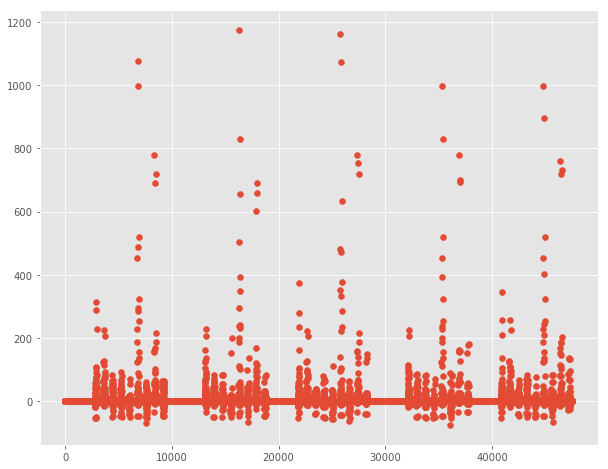

In [125]:
plt.scatter(range(len(gap)), gap)